In [2]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__


'2.3.0'

In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
project_path = '/content/drive/My Drive/AIML/PROJECT/'

In [4]:
#Extract the zip file

from zipfile import ZipFile

zip_path = '/content/drive/My Drive/AIML/PROJECT/Aligned Face Dataset from Pinterest.zip'

with ZipFile(zip_path, 'r') as z:
  z.extractall()

print('Zip extraction done!')

Zip extraction done!


In [5]:
# Function to load images

import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')
metadata

array([PINS/pins_Brit Marling/Brit Marling72_468.jpg,
       PINS/pins_Brit Marling/Brit Marling59_474.jpg,
       PINS/pins_Brit Marling/Brit Marling24_508.jpg, ...,
       PINS/pins_Emma Stone/Emma Stone8.jpg,
       PINS/pins_Emma Stone/Emma Stone103.jpg,
       PINS/pins_Emma Stone/Emma Stone129.jpg], dtype=object)

In [6]:
#Define function to load image

import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

In [7]:
# Load a sample image

path = metadata[1].image_path()
load_image(path)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

Each image in the data set has a same of (301, 299, 3)
The number of features in any image from the data set are: 269997


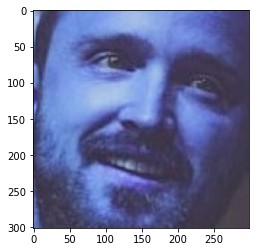

In [8]:
# Load a sample image

import cv2
import matplotlib.pyplot as plt


img = cv2.imread('/content/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg')
print("Each image in the data set has a same of {0}".format(img.shape))
flattened_img = img.flatten()
print("The number of features in any image from the data set are: {0}".format(flattened_img.shape[0]))
plt.imshow(img)

Each image in the data set has a same of (299, 299, 3)
The number of features in any image from the data set are: 268203


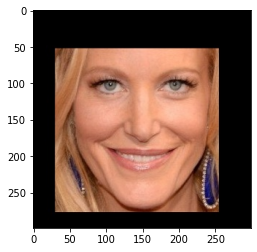

In [9]:
img = cv2.imread('/content/PINS/pins_Anna Gunn/Anna Gunn100_2316.jpg')
imgc = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Each image in the data set has a same of {0}".format(img.shape))
flattened_img = img.flatten()
print("The number of features in any image from the data set are: {0}".format(flattened_img.shape[0]))
plt.imshow(imgc)

In [10]:
# VGG Face model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [11]:
#Load the model

model = vgg_face()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [12]:
# load the given weight file named "vgg_face_weights.h5"

import h5py

model.load_weights = h5py.File('/content/drive/My Drive/AIML/PROJECT/vgg_face_weights.h5', 'r')


In [13]:
# Get vgg_face_descriptor

from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [14]:
# Generate embeddings for each image in the dataset

# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


In [15]:
# Generate embeddings for all images

embeddings = []
for x in range(len(metadata)):
    img_path = metadata[x].image_path()
    img = load_image(img_path)
    img = (img/255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    img = np.expand_dims(img, axis = 0)
    prediction = vgg_face_descriptor.predict(img)[0]
    embeddings.append(prediction)

In [16]:
np.array(embeddings).dump(open('prediction_embeddings.npy', 'wb'))
embeddings = np.load('prediction_embeddings.npy', allow_pickle=True)
embeddings.shape

(10770, 2622)

In [17]:
# Function to calculate distance between given 2 pairs of images

def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

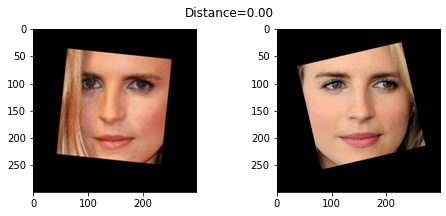

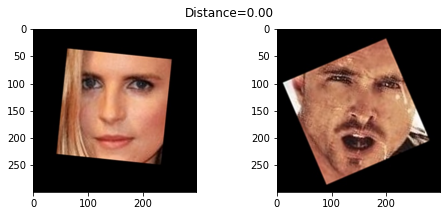

In [38]:
# Plot images and get distance between the pairs given below

import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)


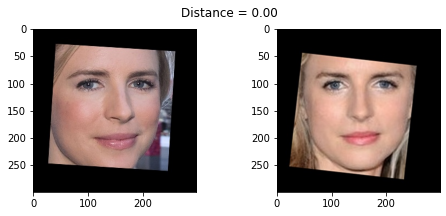

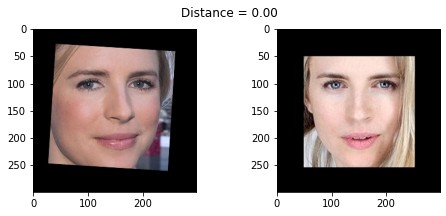

In [19]:
show_pair(30, 31)
show_pair(30, 100)

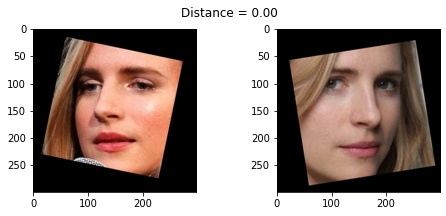

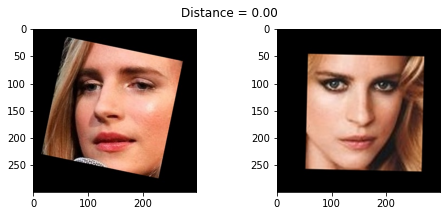

In [20]:
show_pair(70, 72)
show_pair(70, 115)

In [21]:
#Create train and test sets

train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

X_train.shape
X_test.shape


(1197, 2622)

In [22]:
names = []
for i in metadata:
  names.append(i.name)

y_train = np.array(names)[train_idx]
y_test = np.array(names)[test_idx]

y_train.shape
y_test.shape

(1197,)

In [23]:
# Encode the Labels 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [24]:
y_train
y_test

array([ 8,  8,  8, ..., 22, 22, 22])

In [24]:
# Standardize the feature values

# Standarize features
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [25]:
# Reduce dimensions using PCA 

from sklearn.decomposition import PCA

pca = PCA(n_components=128)


In [26]:
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

In [27]:
# Build a Classifier

from sklearn.svm import SVC
classifier = SVC()
classifier.fit(pca_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
classifier.predict(pca_test)

array([27, 98, 60, ..., 17, 61, 54])

In [29]:
classifier.score(pca_train, y_train)

0.36613391831191894

In [30]:
test_predictions = classifier.predict(pca_test)
test_predictions[10]

38

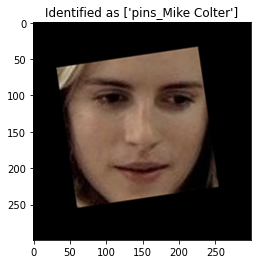

In [31]:
# Test results

import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = test_predictions[10]
example_identity = le.inverse_transform([example_prediction])

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

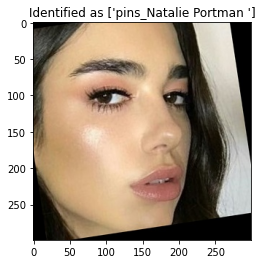

In [32]:
example_idx = 100

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = test_predictions[100]
example_identity = le.inverse_transform([example_prediction])

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

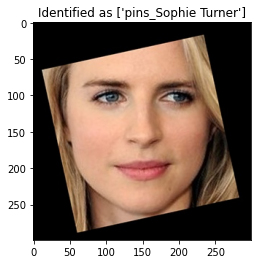

In [33]:
example_idx = 3

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = test_predictions[3]
example_identity = le.inverse_transform([example_prediction])

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

In [ ]:
# The model is able to predict the faces correctly. 

The **mo**